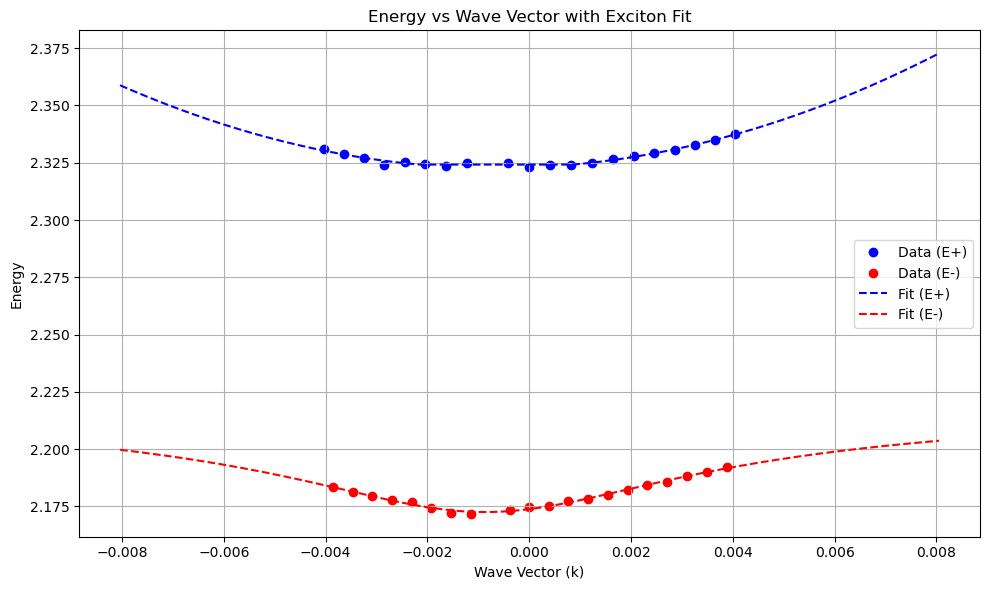

Fitted parameters for E+:
  Parameter a0: 2.3242 ± 0.0003
  Parameter a1: 55.7041 ± 1.6607
  Parameter a2: -0.0007 ± 0.0001
  Parameter a3: 0.0417 ± 0.0012
  Parameter a4: 0.0001 ± 0.0009
Chi-squared (E+): 0.3900
Degrees of freedom (E+): 15
P-value (E+): 1.0000e+00

Fitted parameters for E-:
  Parameter a0: 2.2239 ± 0.0329
  Parameter a1: 39006.3945 ± 7531181.1641
  Parameter a2: -0.0009 ± 0.0000
  Parameter a3: 0.0039 ± 0.0042
  Parameter a4: 2.7643 ± 270.1035
Chi-squared (E-): 0.1247
Degrees of freedom (E-): 15
P-value (E-): 1.0000e+00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Define the fit function based on your equation
def exciton_fit(x, a0, a1, a2, a3, a4):
    term1 = (a0 + a1 * np.sqrt((x - a2)**2 + a3**2)) / 2
    term2 = np.sqrt(4 * a4**2 + (a0 - a1 * np.sqrt((x - a2)**2 + a3**2))**2) / 2
    y_plus = term1 + term2
    y_minus = term1 - term2
    return y_plus, y_minus

# Wrapper function for curve_fit (since curve_fit fits one output at a time)
def exciton_fit_single(x, a0, a1, a2, a3, a4, mode='plus'):
    y_plus, y_minus = exciton_fit(x, a0, a1, a2, a3, a4)
    return y_plus if mode == 'plus' else y_minus

# Function to calculate p-value
def calculate_p_value(chi_squared, dof):
    return 1 - chi2.cdf(chi_squared, dof)

# Function to fit the data and calculate errors
def fit_and_plot_with_errors(file_path):
    # Read the data
    data = pd.read_excel(file_path)
    data.columns = data.columns.str.strip()  # Remove extra spaces

    # Extract data for k+ and k- and their corresponding energy values
    k_plus = data['k+']
    k_minus = data['k-']
    energy_plus = data['E+']
    energy_minus = data['E-']

    # Initial guesses for the parameters [a0, a1, a2, a3, a4]
    initial_params = [2.23, 128, -0.0007, 0.0162, 0.149]

    # Increase maxfev
    maxfev = 7000

    # Fit for E+
    popt_plus, pcov_plus = curve_fit(
        lambda x, a0, a1, a2, a3, a4: exciton_fit_single(x, a0, a1, a2, a3, a4, mode='plus'), 
        k_plus, energy_plus, p0=initial_params, maxfev=maxfev
    )
    perr_plus = np.sqrt(np.diag(pcov_plus))  # Standard errors for parameters

    # Fit for E-
    popt_minus, pcov_minus = curve_fit(
        lambda x, a0, a1, a2, a3, a4: exciton_fit_single(x, a0, a1, a2, a3, a4, mode='minus'), 
        k_minus, energy_minus, p0=initial_params, maxfev=maxfev
    )
    perr_minus = np.sqrt(np.diag(pcov_minus))  # Standard errors for parameters

    # Calculate residuals and chi-squared
    residuals_plus = energy_plus - exciton_fit_single(k_plus, *popt_plus, mode='plus')
    residuals_minus = energy_minus - exciton_fit_single(k_minus, *popt_minus, mode='minus')

    chi_squared_plus = np.sum((residuals_plus / energy_plus.std())**2)
    chi_squared_minus = np.sum((residuals_minus / energy_minus.std())**2)

    dof_plus = len(k_plus) - len(popt_plus)  # Degrees of freedom
    dof_minus = len(k_minus) - len(popt_minus)

    p_value_plus = calculate_p_value(chi_squared_plus, dof_plus)
    p_value_minus = calculate_p_value(chi_squared_minus, dof_minus)

    # Generate smooth x values for plotting, extending beyond the data range
    buffer = 0.004  # A small buffer to extend the x range
    x_smooth = np.linspace(min(k_plus.min(), k_minus.min()) - buffer, 
                           max(k_plus.max(), k_minus.max()) + buffer, 500)

    # Compute fitted values
    y_plus_fit = exciton_fit_single(x_smooth, *popt_plus, mode='plus')
    y_minus_fit = exciton_fit_single(x_smooth, *popt_minus, mode='minus')

    # Plot the data and the fits
    plt.figure(figsize=(10, 6))
    plt.scatter(k_plus, energy_plus, label='Data (E+)', color='blue')
    plt.scatter(k_minus, energy_minus, label='Data (E-)', color='red')
    plt.plot(x_smooth, y_plus_fit, label='Fit (E+)', color='blue', linestyle='--')
    plt.plot(x_smooth, y_minus_fit, label='Fit (E-)', color='red', linestyle='--')
    plt.xlabel('Wave Vector (k)')
    plt.ylabel('Energy')
    plt.title('Energy vs Wave Vector with Exciton Fit')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the fitted parameters and errors
    print("Fitted parameters for E+:")
    for i, (param, error) in enumerate(zip(popt_plus, perr_plus)):
        print(f"  Parameter a{i}: {param:.4f} ± {error:.4f}")
    print(f"Chi-squared (E+): {chi_squared_plus:.4f}")
    print(f"Degrees of freedom (E+): {dof_plus}")
    print(f"P-value (E+): {p_value_plus:.4e}\n")

    print("Fitted parameters for E-:")
    for i, (param, error) in enumerate(zip(popt_minus, perr_minus)):
        print(f"  Parameter a{i}: {param:.4f} ± {error:.4f}")
    print(f"Chi-squared (E-): {chi_squared_minus:.4f}")
    print(f"Degrees of freedom (E-): {dof_minus}")
    print(f"P-value (E-): {p_value_minus:.4e}")

# Example usage
file_path = "C:/Users/oronb/Downloads/E to k.xlsx"
fit_and_plot_with_errors(file_path)


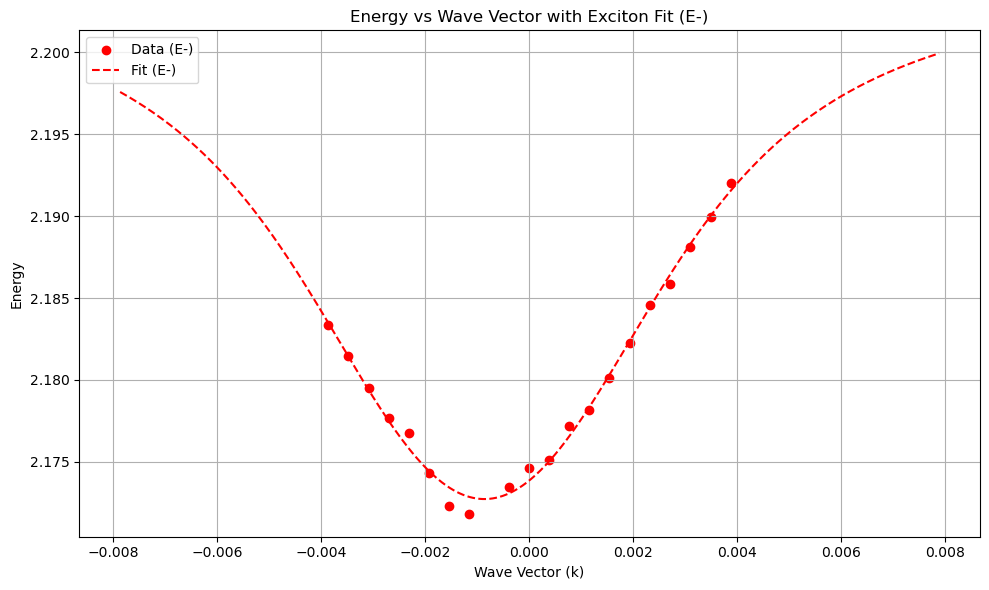

Fitted parameters for E-:
  Parameter a0: 2.2051 ± 0.0143
  Parameter a1: 130.0000 ± 126.6195
  Parameter a2: -0.0009 ± 0.0000
  Parameter a3: 0.0171 ± 0.0154
  Parameter a4: 0.0389 ± 0.0741
Chi-squared (E-): 0.1444
Degrees of freedom (E-): 15
P-value (E-): 1.0000e+00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Define the fit function based on your equation
def exciton_fit(x, a0, a1, a2, a3, a4):
    term1 = (a0 + a1 * np.sqrt((x - a2)**2 + a3**2)) / 2
    term2 = np.sqrt(4 * a4**2 + (a0 - a1 * np.sqrt((x - a2)**2 + a3**2))**2) / 2
    y_plus = term1 + term2
    y_minus = term1 - term2
    return y_minus  # We only return y_minus for E-

# Wrapper function for curve_fit (since curve_fit fits one output at a time)
def exciton_fit_single(x, a0, a1, a2, a3, a4):
    y_minus = exciton_fit(x, a0, a1, a2, a3, a4)
    return y_minus

# Function to calculate p-value
def calculate_p_value(chi_squared, dof):
    return 1 - chi2.cdf(chi_squared, dof)

# Function to fit the data and calculate errors
def fit_and_plot_with_errors(file_path):
    # Read the data
    data = pd.read_excel(file_path)
    data.columns = data.columns.str.strip()  # Remove extra spaces

    # Extract data for k- and its corresponding energy values (E- only)
    k_minus = data['k-']
    energy_minus = data['E-']

    # Initial guesses for the parameters [a0, a1, a2, a3, a4]
    initial_params = [2.23, 128, -0.0007, 0.02, 0.1]

    # Define lower and upper bounds for the parameters
    lower_bounds = [1.0, 40.0, -0.01, 0.0, 0.0]  # example lower bounds
    upper_bounds = [5.0, 130.0, 0.0, 0.1, 0.15]   # example upper bounds

    # Increase maxfev
    maxfev = 7000

    # Fit for E- using weighted fitting (1/dE for E- and 1/dk for k-)
    popt_minus, pcov_minus = curve_fit(
        lambda x, a0, a1, a2, a3, a4: exciton_fit_single(x, a0, a1, a2, a3, a4),
        k_minus, energy_minus, p0=initial_params, maxfev=maxfev, bounds=(lower_bounds, upper_bounds)
    )
    
    perr_minus = np.sqrt(np.diag(pcov_minus))  # Standard errors for parameters

    # Calculate residuals and chi-squared for E-
    residuals_minus = energy_minus - exciton_fit_single(k_minus, *popt_minus)
    chi_squared_minus = np.sum((residuals_minus / energy_minus.std())**2)

    dof_minus = len(k_minus) - len(popt_minus)  # Degrees of freedom

    p_value_minus = calculate_p_value(chi_squared_minus, dof_minus)

    # Generate smooth x values for plotting, extending beyond the data range
    buffer = 0.004  # A small buffer to extend the x range
    x_smooth = np.linspace(k_minus.min() - buffer, k_minus.max() + buffer, 500)

    # Compute fitted values
    y_minus_fit = exciton_fit_single(x_smooth, *popt_minus)

    # Plot the data and the fit for E-
    plt.figure(figsize=(10, 6))
    plt.scatter(k_minus, energy_minus, label='Data (E-)', color='red')
    plt.plot(x_smooth, y_minus_fit, label='Fit (E-)', color='red', linestyle='--')
    plt.xlabel('Wave Vector (k)')
    plt.ylabel('Energy')
    plt.title('Energy vs Wave Vector with Exciton Fit (E-)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the fitted parameters and errors for E-
    print("Fitted parameters for E-:")
    for i, (param, error) in enumerate(zip(popt_minus, perr_minus)):
        print(f"  Parameter a{i}: {param:.4f} ± {error:.4f}")
    print(f"Chi-squared (E-): {chi_squared_minus:.4f}")
    print(f"Degrees of freedom (E-): {dof_minus}")
    print(f"P-value (E-): {p_value_minus:.4e}")

# Example usage
file_path = "C:/Users/oronb/Downloads/E to k.xlsx"
fit_and_plot_with_errors(file_path)


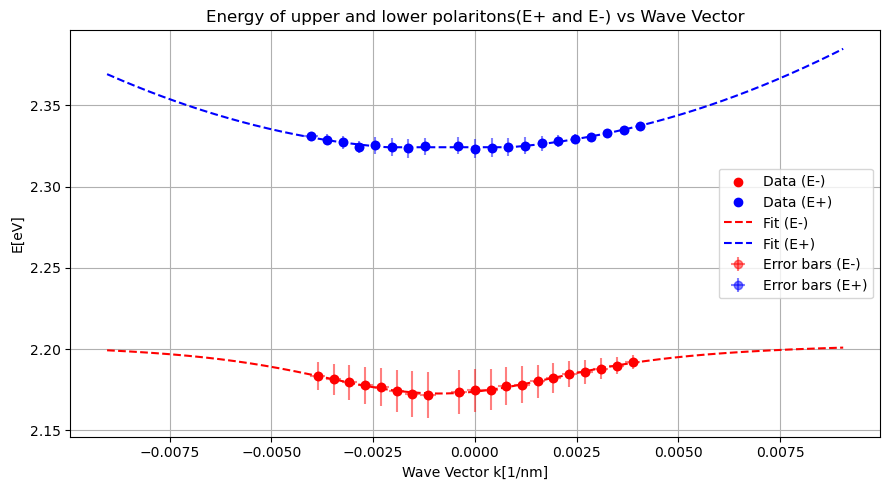

Fitted parameters for E-:
  Parameter a0: 2.2051 ± 0.0143
  Parameter a1: 130.0000 ± 126.6195
  Parameter a2: -0.0009 ± 0.0000
  Parameter a3: 0.0171 ± 0.0154
  Parameter a4: 0.0389 ± 0.0741
Chi-squared (E-): 0.0009

Fitted parameters for E+:
  Parameter a0: 2.3242 ± 0.0003
  Parameter a1: 55.7026 ± 1.6813
  Parameter a2: -0.0007 ± 0.0001
  Parameter a3: 0.0417 ± 0.0013
  Parameter a4: 0.0001 ± 0.0009
Chi-squared (E+): 0.0016


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Define the fit function based on your equation
def exciton_fit(x, a0, a1, a2, a3, a4):
    term1 = (a0 + a1 * np.sqrt((x - a2)**2 + a3**2)) / 2
    term2 = np.sqrt(4 * a4**2 + (a0 - a1 * np.sqrt((x - a2)**2 + a3**2))**2) / 2
    y_plus = term1 + term2
    y_minus = term1 - term2
    return y_minus, y_plus  # Return both E- and E+

# Wrapper function for curve_fit (since curve_fit fits one output at a time)
def exciton_fit_single(x, a0, a1, a2, a3, a4, is_plus=False):
    y_minus, y_plus = exciton_fit(x, a0, a1, a2, a3, a4)
    return y_plus if is_plus else y_minus

# Function to calculate p-value
def calculate_p_value(chi_squared, dof):
    return 1 - chi2.cdf(chi_squared, dof)

# Function to fit the data and calculate errors
def fit_and_plot_with_errors(file_path):
    # Read the data
    data = pd.read_excel(file_path)
    data.columns = data.columns.str.strip()  # Remove extra spaces

    # Extract data for k- and k+ and their corresponding energy values (E- and E+)
    k_minus = data['k-']
    energy_minus = data['E-']
    dk = data['dk-']  # Error in k-
    dE = data['dE-']  # Error in E-

    k_plus = data['k+']
    energy_plus = data['E+']
    dk_plus = data['dk+']  # Error in k+
    dE_plus = data['dE+']  # Error in E+

    # Initial guesses for the parameters [a0, a1, a2, a3, a4]
    initial_params = [2.23, 128, -0.0007, 0.02, 0.1]

    # Define lower and upper bounds for the parameters
    lower_bounds = [1.0, 40.0, -0.01, 0.0, 0.0]  # example lower bounds
    upper_bounds = [5.0, 130.0, 0.0, 0.1, 0.15]   # example upper bounds

    # Increase maxfev
    maxfev = 7000

    # Fit for E- (same as before)
    popt_minus, pcov_minus = curve_fit(
        lambda x, a0, a1, a2, a3, a4: exciton_fit_single(x, a0, a1, a2, a3, a4, is_plus=False),
        k_minus, energy_minus, p0=initial_params, maxfev=maxfev, bounds=(lower_bounds, upper_bounds)
    )
    perr_minus = np.sqrt(np.diag(pcov_minus))  # Standard errors for parameters

    # Fit for E+ (additional fit for E+)
    popt_plus, pcov_plus = curve_fit(
        lambda x, a0, a1, a2, a3, a4: exciton_fit_single(x, a0, a1, a2, a3, a4, is_plus=True),
        k_plus, energy_plus, p0=initial_params, maxfev=maxfev, bounds=(lower_bounds, upper_bounds)
    )
    perr_plus = np.sqrt(np.diag(pcov_plus))  # Standard errors for parameters

    # Generate smooth x values for plotting, extending beyond the data range
    buffer = 0.005  # A small buffer to extend the x range
    x_smooth = np.linspace(min(k_minus.min(), k_plus.min()) - buffer, max(k_minus.max(), k_plus.max()) + buffer, 500)

    # Compute fitted values for both E- and E+
    y_minus_fit = exciton_fit_single(x_smooth, *popt_minus, is_plus=False)
    y_plus_fit = exciton_fit_single(x_smooth, *popt_plus, is_plus=True)

    # Plot the data and the fits for both E- and E+ with error bars
    plt.figure(figsize=(9, 5))
    plt.scatter(k_minus, energy_minus, label='Data (E-)', color='red', zorder=5)
    plt.errorbar(k_minus, energy_minus, yerr=dE, xerr=dk, fmt='o', color='red', alpha=0.5, label="Error bars (E-)")

    plt.scatter(k_plus, energy_plus, label='Data (E+)', color='blue', zorder=5)
    plt.errorbar(k_plus, energy_plus, yerr=dE_plus, xerr=dk_plus, fmt='o', color='blue', alpha=0.5, label="Error bars (E+)")

    plt.plot(x_smooth, y_minus_fit, label='Fit (E-)', color='red', linestyle='--', zorder=10)
    plt.plot(x_smooth, y_plus_fit, label='Fit (E+)', color='blue', linestyle='--', zorder=10)

    plt.xlabel('Wave Vector k[1/nm]')
    plt.ylabel('E[eV]')
    plt.title('Energy of upper and lower polaritons(E+ and E-) vs Wave Vector')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print the fitted parameters and errors for both E- and E+
    print("Fitted parameters for E-:")
    for i, (param, error) in enumerate(zip(popt_minus, perr_minus)):
        print(f"  Parameter a{i}: {param:.4f} ± {error:.4f}")
    print(f"Chi-squared (E-): {np.sum((energy_minus - exciton_fit_single(k_minus, *popt_minus, is_plus=False))**2) / energy_minus.std():.4f}")

    print("\nFitted parameters for E+:")
    for i, (param, error) in enumerate(zip(popt_plus, perr_plus)):
        print(f"  Parameter a{i}: {param:.4f} ± {error:.4f}")
    print(f"Chi-squared (E+): {np.sum((energy_plus - exciton_fit_single(k_plus, *popt_plus, is_plus=True))**2) / energy_plus.std():.4f}")

# Example usage
file_path = "C:/Users/oronb/Downloads/E to k.xlsx"
fit_and_plot_with_errors(file_path)

